# LAB1 - Trabajando con estadisticas sobre las opciones del SPX

En este articulo vamos a tratar un uso basico de pandas. Crearemos un dataframe de una serie de archivos separados por comas , y lo guardaremos en pickle para su posterior uso.  
Ademas realizaremos un analisis exploratorio de los datos que nos puede dar una vision preliminar de lo que estamos tratanto.

#### Cargamos todas las librerias necesarias 

In [1]:
import pandas as pd 
import os
import numpy as np 
import seaborn as sns
import scipy 
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 30, 12 
plt.style.use('ggplot')

### Vamos a crear el dataframe

Vamos a declarar una carpeta, donde tendremos nuestros archivos csv que queramos anyadir a nuestro dataframe para su posterior tratamiento

In [2]:
mainpath = '../../datasets/lab1/'
files = os.listdir(mainpath)
Symbol = 'SPX'
symboldataname = 'spx_stats.pickle'
Symbol2 ='RUT'
symboldataname2 = 'rut_stats.pickle'

Vamos a cargar todos los archivos que hay dentro del mainpath, y indexarlos por quotedate

In [3]:
datos={}
contador = 1
df = pd.DataFrame()
data = pd.DataFrame()


for file in range(len(files)):
    usefile = files[file]
    print("Archivo numero :" + str(contador) + " de un total de " + str((len(files))) + " archivos")
    contador = contador +1
    ruta = mainpath + "/" + str(usefile) 
    df = pd.read_csv(ruta,parse_dates=True,index_col=['quotedate'])
    datos[usefile] = df
        
data = pd.concat(datos.values(), keys=datos.keys() , sort='True')

Archivo numero :1 de un total de 96 archivos
Archivo numero :2 de un total de 96 archivos
Archivo numero :3 de un total de 96 archivos
Archivo numero :4 de un total de 96 archivos
Archivo numero :5 de un total de 96 archivos
Archivo numero :6 de un total de 96 archivos
Archivo numero :7 de un total de 96 archivos
Archivo numero :8 de un total de 96 archivos
Archivo numero :9 de un total de 96 archivos
Archivo numero :10 de un total de 96 archivos
Archivo numero :11 de un total de 96 archivos
Archivo numero :12 de un total de 96 archivos
Archivo numero :13 de un total de 96 archivos
Archivo numero :14 de un total de 96 archivos
Archivo numero :15 de un total de 96 archivos
Archivo numero :16 de un total de 96 archivos
Archivo numero :17 de un total de 96 archivos
Archivo numero :18 de un total de 96 archivos
Archivo numero :19 de un total de 96 archivos
Archivo numero :20 de un total de 96 archivos
Archivo numero :21 de un total de 96 archivos
Archivo numero :22 de un total de 96 archiv

In [4]:
data.head(5)

calloi  callvol  comment  iv30call  \
                            quotedate                                        
L2_optionstats_20020226.csv 2002-02-26   37977     1370      NaN    0.4000   
                            2002-02-26   48794      570      NaN    0.2912   
                            2002-02-26    5802        0      NaN    0.6245   
                            2002-02-26  124561     1304      NaN    0.5788   
                            2002-02-26    2180       40      NaN    0.4048   

                                        iv30mean  iv30put  putoi  putvol  \
                            quotedate                                      
L2_optionstats_20020226.csv 2002-02-26    0.4072   0.4143  24638      73   
                            2002-02-26    0.2871   0.2829  33643     488   
                            2002-02-26    0.6245   0.6245    446       0   
                            2002-02-26    0.5552   0.5317  67165    1160   
                            2002-02-26    0.4048   0.4048   1265       2   

                                       symbol  totalvol  
                            quotedate                    
L2_optionstats_20020226.csv 2002-02-26      A      1443  
                            2002-02-26     AA      1058  
                            2002-02-26    AAI         0  
                            2002-02-26   AAPL      2464  
                            2002-02-26    ABF        42

Como podemos observar, necesitamos manipular el dataframe para adaptarlo a nuestras necesidades, le quitaremos el multinidice, y seleccionaremos sol las columnas que nos interesen.  
ademas tambien lo ordenaremos

In [5]:
data = data[['symbol','iv30call','calloi','callvol','iv30put','putoi','putvol','iv30mean','totalvol']]
data = data.droplevel(level=0)
data = data.sort_index(axis=0)


In [6]:
data.head(5)

,symbol,iv30call,calloi,callvol,iv30put,putoi,putvol,iv30mean,totalvol
quotedate,,,,,,,,,
2002-02-01,RUT,0.2198,5938,107,0.1924,6350,5,0.2061,112
2002-02-01,SPX,0.1864,759979,42733,0.1785,961768,52404,0.1824,95137
2002-02-01,OEX,0.1965,89936,10661,0.2025,103760,13937,0.1995,24598
2002-02-01,NDX,0.3723,12828,800,0.3483,23365,1091,0.3603,1891
2002-02-04,SPX,0.2140,760140,22205,0.2138,969114,44813,0.2139,67018


Ahora, vamos a crear dos dataframes cada uno con un ticker distinto, y los guardaremos en formato pickle para su posterior uso

In [7]:
symboldata = data[data['symbol'] == Symbol]
symboldata2 = data[data['symbol'] == Symbol2]
symboldata = symboldata[['iv30call','calloi','callvol','iv30put','putoi','putvol','iv30mean','totalvol']]
symboldata2 = symboldata2[['iv30call','calloi','callvol','iv30put','putoi','putvol','iv30mean','totalvol']]
symboldata = symboldata.sort_index(axis=0)
symboldata2 = symboldata2.sort_index(axis=0)
symboldata.to_pickle('/home/py/datasets/pickle'+ '/' + symboldataname)
symboldata2.to_pickle('/home/py/datasets/pickle' + '/' + symboldataname2 )


In [8]:
symboldata.head(5)

,iv30call,calloi,callvol,iv30put,putoi,putvol,iv30mean,totalvol
quotedate,,,,,,,,
2002-02-01,0.1864,759979,42733,0.1785,961768,52404,0.1824,95137
2002-02-04,0.2140,760140,22205,0.2138,969114,44813,0.2139,67018
2002-02-05,0.2056,752064,39131,0.2282,987312,56760,0.2169,95891
2002-02-06,0.2237,769705,42954,0.2278,1006851,45715,0.2258,88669
2002-02-07,0.2004,767797,32972,0.2333,1022354,57889,0.2168,90861


In [9]:
symboldata2.head(5)

,iv30call,calloi,callvol,iv30put,putoi,putvol,iv30mean,totalvol
quotedate,,,,,,,,
2002-02-01,0.2198,5938,107,0.1924,6350,5,0.2061,112
2002-02-04,0.2336,6000,86,0.2412,6352,85,0.2374,171
2002-02-05,0.2549,6076,1089,0.2461,6368,2411,0.2505,3500
2002-02-06,0.2575,6649,5,0.2635,8486,1854,0.2605,1859
2002-02-07,0.2518,6147,28,0.2945,9572,153,0.2732,181


#### Cargamos el pickle, y comparamos la velocidad de carga en comparacion del read csv 

In [10]:
df1 = pd.read_pickle('/home/py/datasets/pickle'+ '/' + symboldataname)
df2 = pd.read_pickle('/home/py/datasets/pickle'+ '/' + symboldataname2)

Calculamos la correlacion de una ventana de 5 periodos entre dataframes

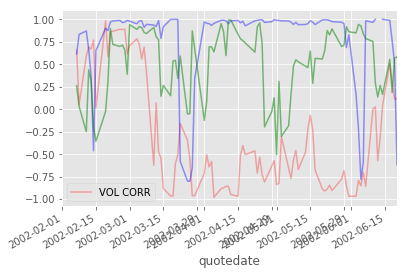

In [11]:

df1.iv30put.rolling(5).corr(df1.iv30call.rolling(5)).plot(color='r',alpha=0.3)
plt.legend(['IV CORR'])
df1.putoi.rolling(5).corr(df1.calloi.rolling(5)).plot(color='b',alpha=0.4)
plt.legend(['IO CORR'])
df1.putvol.rolling(5).corr(df1.callvol.rolling(5)).plot(color='g',alpha=0.5)
plt.legend(['VOL CORR'])


In [12]:
correlacion = df1.corr(method = 'kendall')
correlacion_mean = correlacion.mean() 

Vamos a visualizar las correlaciones entre las variables

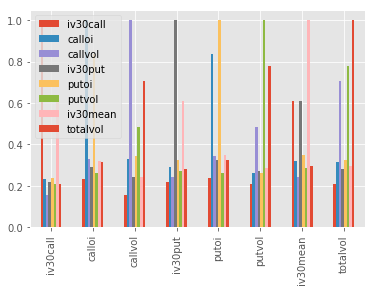

In [13]:
correlacion.plot.bar()

Con esta forma de visualizar la informacion, queda clara, pero aun podriamos visualizarla mucho mejor mediante un mapa de calor

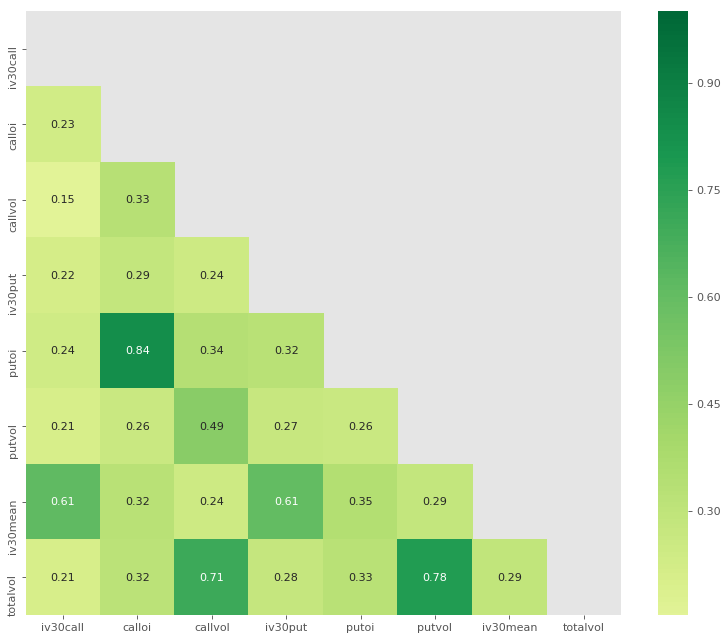

In [14]:
mask = np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(correlacion,mask=mask,
            cmap='RdYlGn',center=0, annot=True)


In [15]:
correlacionintermarket = pd.DataFrame(index=df1.index)
correlacionintermarket['iv30callRUT'] = df2.iv30call
correlacionintermarket['calloiRUT'] = df2.calloi
correlacionintermarket['callvolRUT'] = df2.callvol
correlacionintermarket['iv30putRUT'] = df2.iv30put
correlacionintermarket['putoiRUT'] = df2.putoi
correlacionintermarket['putvolRUT'] = df2.putvol
correlacionintermarket['ivmean30RUT'] = df2.iv30mean
correlacionintermarket['totalvolRUT'] = df2.totalvol
correlacionintermarket = correlacionintermarket.corr(method = 'kendall')
correlacionintermarketmean = correlacionintermarket.mean()

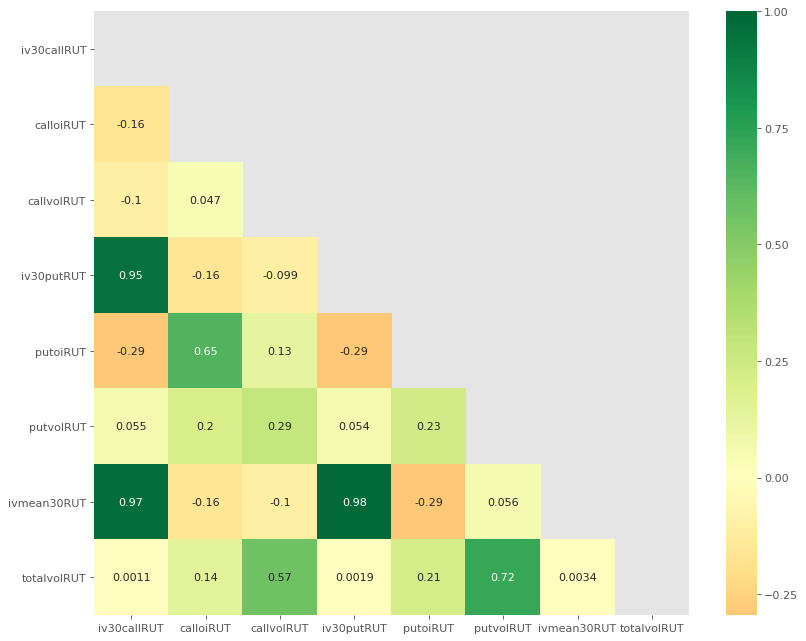

In [16]:
mask = np.zeros_like(correlacionintermarket, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(correlacionintermarket,mask=mask,
            cmap='RdYlGn',center=0, annot=True)
